In [1]:
#%matplotlib
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

In [2]:
def func(x, a, m):
    return a * x * np.exp(m*x)

In [3]:
x = np.linspace(0, 2, 11)
y = [0, 2.40, 3.00, 2.55, 2.24, 1.72, 1.18, 0.82, 0.56, 0.42, 0.25]

In [4]:
fig = plt.figure(figsize=(12,9))
ax = fig.add_subplot(111)
ax.plot(x, y, 'ro', label='Original Data')

In [5]:
popt, pcov = curve_fit(func, x, y)
ax.plot(x, func(x, *popt), 'b-', label='fit')
ax.text(1.5, 2.5, "a = {:0.3f}".format(popt[0]), fontsize=15)
ax.text(1.5, 2.4, "m = {:0.3f}".format(popt[1]), fontsize=15)

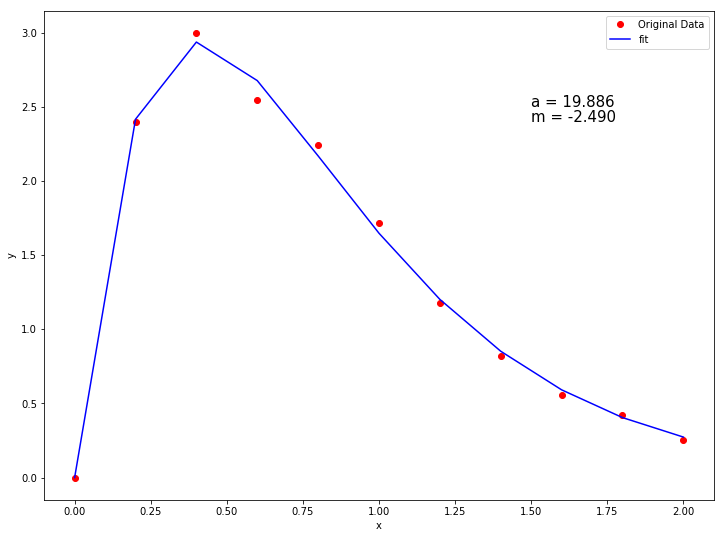

In [6]:
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

In [7]:
func(x, *popt)

array([ 0.        ,  2.41694176,  2.93750134,  2.67763406,  2.16956094,
        1.64802486,  1.20178533,  0.85203136,  0.59173794,  0.4045422 ,
        0.27315126])

In [8]:
from sympy import *
x, a, m = symbols('x a m')
init_printing()
xs = np.linspace(0, 2, 11)
ys = [0, 2.40, 3.00, 2.55, 2.24, 1.72, 1.18, 0.82, 0.56, 0.42, 0.25]

In [9]:
eq = a * x * exp(x*m)
eq

In [29]:
v = []
suma = 0
for i in range(len(ys)):
    v.append(ys[i]-eq.subs(x,xs[i]))
    suma = suma + (ys[i]-eq.subs(x,xs[i]))**2
print(v)
print(suma)

[0, -0.2*a*exp(0.2*m) + 2.4, -0.4*a*exp(0.4*m) + 3.0, -0.6*a*exp(0.6*m) + 2.55, -0.8*a*exp(0.8*m) + 2.24, -1.0*a*exp(1.0*m) + 1.72, -1.2*a*exp(1.2*m) + 1.18, -1.4*a*exp(1.4*m) + 0.82, -1.6*a*exp(1.6*m) + 0.56, -1.8*a*exp(1.8*m) + 0.42, -2.0*a*exp(2.0*m) + 0.25]
(-0.2*a*exp(0.2*m) + 2.4)**2 + (-0.4*a*exp(0.4*m) + 3.0)**2 + (-0.6*a*exp(0.6*m) + 2.55)**2 + (-0.8*a*exp(0.8*m) + 2.24)**2 + (-1.0*a*exp(1.0*m) + 1.72)**2 + (-1.2*a*exp(1.2*m) + 1.18)**2 + (-1.4*a*exp(1.4*m) + 0.82)**2 + (-1.6*a*exp(1.6*m) + 0.56)**2 + (-1.8*a*exp(1.8*m) + 0.42)**2 + (-2.0*a*exp(2.0*m) + 0.25)**2


In [49]:
f1 = diff(suma,a)
print(f1)

-0.4*(-0.2*a*exp(0.2*m) + 2.4)*exp(0.2*m) - 0.8*(-0.4*a*exp(0.4*m) + 3.0)*exp(0.4*m) - 1.2*(-0.6*a*exp(0.6*m) + 2.55)*exp(0.6*m) - 1.6*(-0.8*a*exp(0.8*m) + 2.24)*exp(0.8*m) - 2.0*(-1.0*a*exp(1.0*m) + 1.72)*exp(1.0*m) - 2.4*(-1.2*a*exp(1.2*m) + 1.18)*exp(1.2*m) - 2.8*(-1.4*a*exp(1.4*m) + 0.82)*exp(1.4*m) - 3.2*(-1.6*a*exp(1.6*m) + 0.56)*exp(1.6*m) - 3.6*(-1.8*a*exp(1.8*m) + 0.42)*exp(1.8*m) - 4.0*(-2.0*a*exp(2.0*m) + 0.25)*exp(2.0*m)


In [48]:
f2 = diff(suma,m)
print(f2)

-0.08*a*(-0.2*a*exp(0.2*m) + 2.4)*exp(0.2*m) - 0.32*a*(-0.4*a*exp(0.4*m) + 3.0)*exp(0.4*m) - 0.72*a*(-0.6*a*exp(0.6*m) + 2.55)*exp(0.6*m) - 1.28*a*(-0.8*a*exp(0.8*m) + 2.24)*exp(0.8*m) - 2.0*a*(-1.0*a*exp(1.0*m) + 1.72)*exp(1.0*m) - 2.88*a*(-1.2*a*exp(1.2*m) + 1.18)*exp(1.2*m) - 3.92*a*(-1.4*a*exp(1.4*m) + 0.82)*exp(1.4*m) - 5.12*a*(-1.6*a*exp(1.6*m) + 0.56)*exp(1.6*m) - 6.48*a*(-1.8*a*exp(1.8*m) + 0.42)*exp(1.8*m) - 8.0*a*(-2.0*a*exp(2.0*m) + 0.25)*exp(2.0*m)


In [50]:
print(nsolve((f1, f2), (a, m), (8, 0), verify=False, prec=5))

[ 19.8214613380287]
[-2.48701070171148]


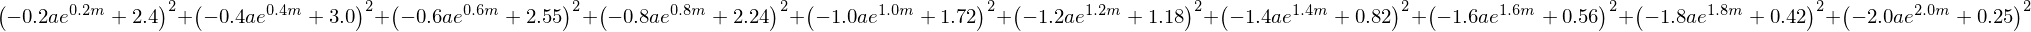

In [56]:
suma